<a href="https://colab.research.google.com/github/KashmiraKor/LGMVIP--Data-Science/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis on Dataset - Terrorism**

Dataset Link : https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Data

In [2]:
data=pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,76,79,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data has been successfully imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29975 entries, 0 to 29974
Columns: 135 entries, eventid to related
dtypes: float64(77), int64(1), object(57)
memory usage: 30.9+ MB


In [4]:
df.shape

(29975, 135)

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
for i in df.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

Clean Data

In [8]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970.0,0.0,0.0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970.0,1.0,0.0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970.0,1.0,0.0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970.0,1.0,0.0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [9]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [10]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970.0,0.0,0.0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970.0,1.0,0.0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970.0,1.0,0.0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970.0,1.0,0.0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29975 entries, 0 to 29974
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            29974 non-null  float64
 1   Month           29974 non-null  float64
 2   Day             29974 non-null  float64
 3   Country         29974 non-null  object 
 4   Region          29974 non-null  object 
 5   Province/State  29855 non-null  object 
 6   City            29974 non-null  object 
 7   Latitude        28397 non-null  float64
 8   Longitude       28397 non-null  float64
 9   Location        676 non-null    object 
 10  Summary         1092 non-null   object 
 11  Attack Type     29974 non-null  object 
 12  Target Type     29974 non-null  object 
 13  Group Name      29974 non-null  object 
 14  Motive          821 non-null    object 
 15  Weapon Type     29974 non-null  object 
 16  Killed          24447 non-null  float64
 17  Wounded         22698 non-null 

In [12]:
df.shape

(29975, 19)

In [13]:
df.isnull().sum()

Year                  1
Month                 1
Day                   1
Country               1
Region                1
Province/State      120
City                  1
Latitude           1578
Longitude          1578
Location          29299
Summary           28883
Attack Type           1
Target Type           1
Group Name            1
Motive            29154
Weapon Type           1
Killed             5528
Wounded            7277
Add Notes         29157
dtype: int64

In [14]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [15]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,29974.000000,29974.000000,29974.000000,28397.000000,2.839700e+04,29975.000000,29975.000000,29975.000000
mean,1980.792086,6.350404,15.175952,19.813379,-3.067458e+03,1.789691,1.296547,3.086239
std,4.065549,3.398355,8.881986,25.440026,5.114460e+05,8.619540,10.015796,14.371177
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1979.000000,3.000000,8.000000,6.313712,-8.304792e+01,0.000000,0.000000,0.000000
50%,1981.000000,6.000000,15.000000,15.030000,-6.606113e+01,0.000000,0.000000,0.000000
75%,1984.000000,9.000000,23.000000,41.733244,9.174508e+00,1.000000,0.000000,1.000000
max,1987.000000,12.000000,31.000000,64.837778,1.747763e+02,422.000000,751.000000,760.000000


In [23]:
data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999938,-0.016455,-0.005607,-0.052749,-0.303581,-0.107868,-0.397326,-0.001959,0.146019,0.075924,-0.006376,0.038777,-0.101992,0.009515,-0.275455,0.090483,0.056705,0.027477,-0.027862,0.123756,1.0,0.101986,0.102869,-0.279093,-0.090140,-0.140391,-0.157200,-0.234967,-0.295142,-0.143314,NaN,0.065596,-0.419577,-0.615382,-0.017553,0.390507,0.346095,-0.075425,0.090983,0.542170,0.689273,NaN,1.0,-0.333397,0.014502,-0.076436,0.022178,-0.031753,0.064735,0.200044,0.048367,-0.000928,0.093492,0.025007,0.144066,0.037814,0.026743,0.127712,0.166385,0.199217,0.006178,-0.034121,0.018137,-0.020043,0.159516,0.065614,-0.078280,-0.001625,NaN,-0.161486,NaN,0.101043,0.076948,0.044833,0.042402,-0.182805,-0.039726
iyear,0.999938,1.000000,-0.024880,-0.005934,-0.052738,-0.303519,-0.107543,-0.396858,-0.001875,0.146186,0.075968,-0.006799,0.038784,-0.101985,0.009640,-0.275480,0.090639,0.056693,0.027351,-0.027699,0.123898,1.0,0.102099,0.102930,-0.278893,-0.090169,-0.140485,-0.157305,-0.236787,-0.296905,-0.141438,NaN,0.065608,-0.420045,-0.617065,-0.017587,0.390335,0.347535,-0.074218,0.096440,0.539178,0.687489,NaN,1.0,-0.274232,0.014602,-0.076363,0.022351,-0.031937,0.064395,0.201260,0.049947,-0.000245,0.093379,0.024777,0.143775,0.037629,0.026560,0.127492,0.166275,0.199241,0.006101,-0.034162,0.017917,-0.020090,0.159514,0.065279,-0.078228,-0.001293,NaN,-0.162933,NaN,0.100564,0.076718,0.044883,0.042454,-0.182853,-0.039670
imonth,-0.016455,-0.024880,1.000000,0.020717,0.006874,0.000489,-0.030625,-0.037550,-0.009862,-0.025248,-0.008110,-0.004002,-0.001182,0.003811,-0.012763,0.004686,-0.022362,0.001804,0.014200,-0.019249,-0.014374,NaN,-0.018876,-0.012928,-0.011786,0.004277,0.011733,0.013996,0.236931,0.254254,-0.151008,NaN,-0.000198,0.033174,0.218543,0.003958,0.028145,0.034005,-0.098630,0.058064,0.446009,0.010644,NaN,-1.0,0.239268,-0.012136,-0.012106,-0.020273,0.021361,0.017610,-0.116118,-0.124236,-0.051836,0.010304,0.034115,0.038902,0.020474,0.026928,0.025949,0.002902,-0.002477,0.008318,0.007981,0.023713,0.005811,0.005946,-0.011805,-0.004838,-0.036200,NaN,0.168966,NaN,0.027839,0.009635,-0.012532,-0.012519,0.009892,-0.012167
iday,-0.005607,-0.005934,0.020717,1.000000,-0.000430,0.017323,0.008996,-0.000417,-0.005882,-0.021315,-0.001116,0.009420,-0.002510,0.015505,-0.005207,-0.006670,-0.011798,0.000453,-0.001221,-0.038789,-0.166605,-1.0,-0.003425,-0.005528,0.011734,-0.161912,-0.128435,-0.130437,-0.060385,-0.228484,-0.122599,NaN,-0.004909,-0.400577,-0.518541,-0.003624,-0.022341,-0.017554,-0.006696,0.116185,0.235831,0.636483,NaN,1.0,-0.353345,-0.026275,0.024469,0.035200,0.008644,0.080078,-0.035868,-0.041529,0.004321,-0.005813,0.019564,0.036446,-0.001149,0.009407,0.025462,0.004126,0.013543,0.017040,-0.006531,-0.035541,-0.012672,-0.057355,-0.017528,-0.003877,0.000404,NaN,0.007095,NaN,0.029853,-0.044259,-0.006630,-0.007133,0.017309,0.002171
extended,-0.052749,-0.052738,0.006874,-0.000430,1.000000,-0.047492,0.000700,-0.024251,0.000755,0.013798,-0.007956,-0.005955,0.010944,0.038271,-0.046448,0.010425,-0.026629,0.036713,-0.003975,0.156670,0.167544,NaN,-0.029379,-0.022167,-0.001419,-0.000725,0.070794,-0.045868,0.240366,0.127313,-0.273456,NaN,-0.011350,NaN,NaN,0.007125,0.023102,0.117160,0.045353,0.159792,NaN,NaN,NaN,NaN,-0.288675,0.2

In [24]:
data['country_txt'].value_counts()

El Salvador       3616
Peru              2671
United Kingdom    2503
Colombia          2123
United States     1891
                  ... 
South Vietnam        1
Finland              1
Czechoslovakia       1
New Hebrides         1
Belize               1
Name: country_txt, Length: 138, dtype: int64

Visualizing the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


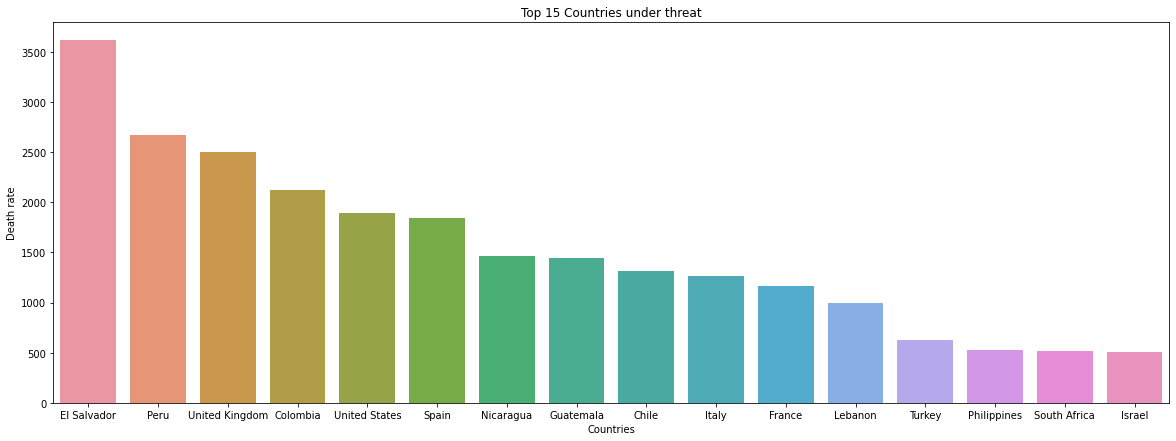

In [25]:
plt.figure(figsize=(20,7))
c = data['country_txt'].value_counts().index
sns.countplot(data['country_txt'], order=c[:16]);
plt.xlabel('Countries')
plt.ylabel('Death rate')
plt.title('Top 15 Countries under threat')
plt.show()

In [26]:
data['attacktype1_txt'].value_counts()

Bombing/Explosion                      13597
Armed Assault                           6303
Assassination                           4893
Facility/Infrastructure Attack          2151
Hostage Taking (Kidnapping)             1319
Unknown                                 1067
Hostage Taking (Barricade Incident)      442
Hijacking                                149
Unarmed Assault                           53
Name: attacktype1_txt, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


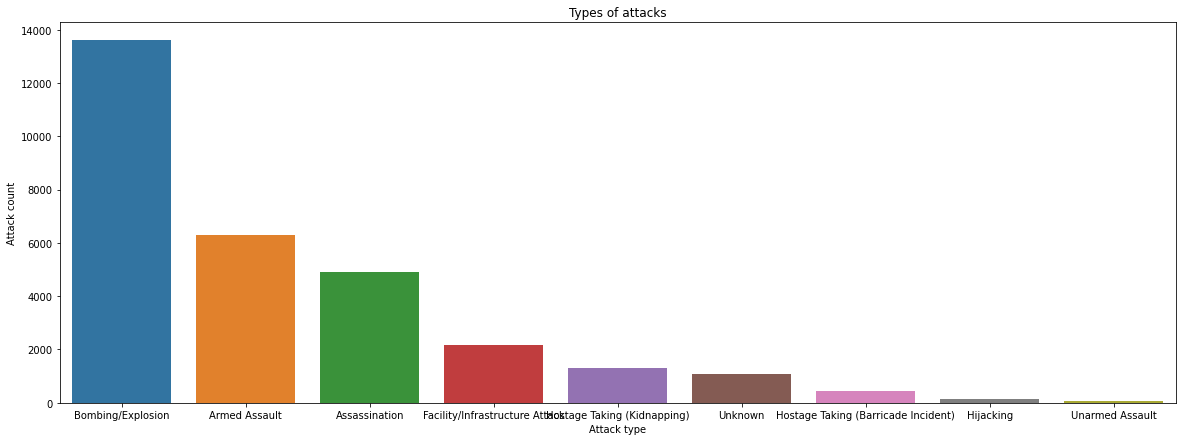

In [27]:
plt.figure(figsize=(20,7))
attack = data['attacktype1_txt'].value_counts().index
sns.countplot(data['attacktype1_txt'], order=attack[:]);
plt.xlabel('Attack type')
plt.ylabel('Attack count')
plt.title('Types of attacks')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


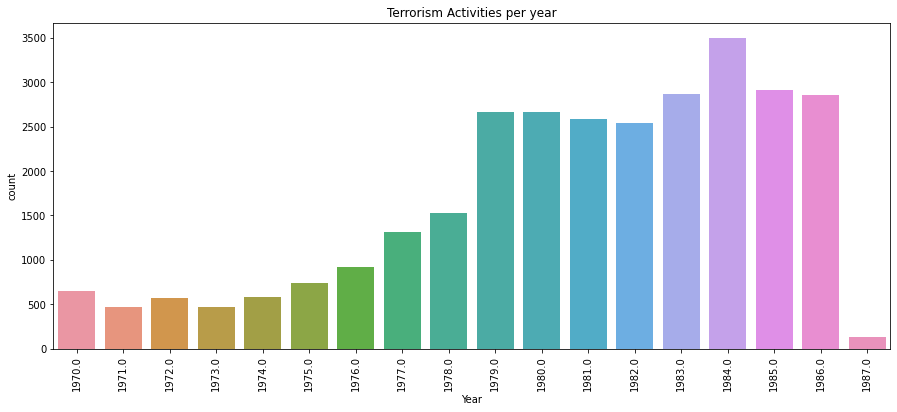

In [28]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear', data=data)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.title('Terrorism Activities per year')
plt.show()

In [29]:
data['region_txt'].value_counts()

Western Europe                 8127
South America                  7067
Central America & Caribbean    6856
Middle East & North Africa     3065
North America                  2046
Sub-Saharan Africa             1023
South Asia                      869
Southeast Asia                  687
East Asia                       136
Australasia & Oceania            50
Eastern Europe                   48
Name: region_txt, dtype: int64

In [30]:
group_attack = data['gname'].value_counts()
group_attack

Unknown                                              9461
Shining Path (SL)                                    2027
Farabundo Marti National Liberation Front (FMLN)     1777
Irish Republican Army (IRA)                          1630
Basque Fatherland and Freedom (ETA)                  1125
                                                     ... 
Fighting Ecologist Movement                             1
PORE                                                    1
Thai Communists                                         1
People's Liberation Front of Niger                      1
Fighters for the Liberation of the Turkish People       1
Name: gname, Length: 1240, dtype: int64

In [31]:
ES_attacks = data[data.country_txt=='El Salvador'].reset_index()

In [32]:
ES_attacks.head()


,index,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1615,197211050001,1972.0,11.0,5.0,NaN,0.0,NaN,61.0,El Salvador,2.0,Central America & Caribbean,San Salvador,San Salvador,13.692880,-89.199161,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,6.0,Airports & Aircraft,NaN,NaN,NaN,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1.0,3.0,Minor (likely < $1 million),5000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
1,1624,197211150001,1972.0,11.0,15.0,NaN,0.0,NaN,61.0,El Salvador,2.0,Central America & Caribbean,San Salvador,San Salvador,13.692880,-89.199161,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,Argentina Pavilion,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
2,1856,197304290001,1973.0,4.0,29.0,NaN,0.0,NaN,61.0,El Salvador,2.0,Central America & Caribbean,San Salvador,San Salvador,13.692880,-89.199161,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,1.0,Business,4.0,Multinational Corporation,IBM office,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,2211,197402000001,1974.0,2.0,0.0,NaN,0.0,NaN,61.0,El Salvador,2.0,Central America & Caribbean,Santa Ana,Chalchuapa,13.986667,-89.681111,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,3.0,Police,22.0,"Police Building (headquarters, station, school)",NaN,...,NaN,NaN,Chlorate bomb,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
4,2265,197403060001,1974.0,3.0,6.0,NaN,0.0,NaN,61.0,El Salvador,2.0,Central America & Caribbean,San Salvador,San Salvador,13.692880,-89.199161,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,2.0,Armed Assault,NaN,NaN,NaN,NaN,2.0,Government (General),21.0,Government Building/Facility/Office,NaN,...,NaN,NaN,Pistols,NaN,NaN,NaN,3.0,NaN,NaN,1.0,3.0,Minor (likely < $1 million),2000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN


In [33]:
print(f"""{ES_attacks.city.nunique()} cities were attacked by {ES_attacks.gname.nunique()} terrorist groups between the year {ES_attacks.iyear.min()} and {ES_attacks.iyear.max()}.
 The total number of terrorist attacks in El Salvador is {ES_attacks.index.nunique()}""")

482 cities were attacked by 39 terrorist groups between the year 1972.0 and 1987.0.
 The total number of terrorist attacks in El Salvador is 3616
